# LAB | Introduction to MLOps

Answer the questions,

Data source: https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page

In [2]:
import pandas as pd

In [3]:
# !pip install pyarrow

In [4]:
df_jan = pd.read_parquet('./data/fhv_tripdata_2021-01.parquet')
df_feb = pd.read_parquet('./data/fhv_tripdata_2021-02.parquet')

**Q1: Read the data for January. How many records are there?**

In [5]:
# your code here
df_jan.shape

(1154112, 7)

In [6]:
df_jan.head()


,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,None,B00013
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037


In [7]:
df_jan.isnull().sum()

dispatching_base_num            0
pickup_datetime                 0
dropOff_datetime                0
PUlocationID               958267
DOlocationID               162220
SR_Flag                   1154112
Affiliated_base_number        885
dtype: int64

In [8]:
df_jan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1154112 entries, 0 to 1154111
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   dispatching_base_num    1154112 non-null  object        
 1   pickup_datetime         1154112 non-null  datetime64[us]
 2   dropOff_datetime        1154112 non-null  datetime64[us]
 3   PUlocationID            195845 non-null   float64       
 4   DOlocationID            991892 non-null   float64       
 5   SR_Flag                 0 non-null        object        
 6   Affiliated_base_number  1153227 non-null  object        
dtypes: datetime64[us](2), float64(2), object(3)
memory usage: 61.6+ MB


In [9]:
print(f"There are {df_jan.shape[0]} rows and {df_jan.shape[1]} columns in the January 2021 FHV trip data.")

There are 1154112 rows and 7 columns in the January 2021 FHV trip data.


**Q2: What's the average trip duration in January?**

In [10]:
# your code here
df_jan["trip_duration"] = df_jan["dropOff_datetime"]- df_jan["pickup_datetime"]
display(df_jan["trip_duration"])

0         0 days 00:17:00
1         0 days 00:17:00
2         0 days 01:50:00
3         0 days 00:08:17
4         0 days 00:15:13
                ...      
1154107   0 days 00:08:45
1154108   0 days 00:57:36
1154109   0 days 00:16:12
1154110   0 days 00:19:26
1154111   0 days 00:36:00
Name: trip_duration, Length: 1154112, dtype: timedelta64[us]

In [11]:
df_jan["trip_duration"].mean()

Timedelta('0 days 00:19:10.033445')

In [12]:
print(f"The average trip duration in January is {df_jan["trip_duration"].mean()}")

The average trip duration in January is 0 days 00:19:10.033445


**Q3: How many records did you drop?**

In [13]:
print("Missing values analysis:")
print(df_jan.isnull().sum())
print("\n")

Missing values analysis:
dispatching_base_num            0
pickup_datetime                 0
dropOff_datetime                0
PUlocationID               958267
DOlocationID               162220
SR_Flag                   1154112
Affiliated_base_number        885
trip_duration                   0
dtype: int64




In [14]:
print("Before any processing:")
print(f"Total records: {len(df_jan)}")

Before any processing:
Total records: 1154112


In [15]:
print("SR_Flag unique values:")
print(df_jan['SR_Flag'].value_counts())
print("\n")

SR_Flag unique values:
Series([], Name: count, dtype: int64)




In [16]:
# drop SR_Flag column (axis=1 drops columns; axis=0 would try to drop a row label)
df_jan_clean = df_jan.drop('SR_Flag', axis=1)
print(f"After dropping SR_Flag: {df_jan_clean.shape}")

After dropping SR_Flag: (1154112, 7)


In [17]:
print("Affiliated_base_number missing analysis:")
print(f"Missing: {df_jan_clean['Affiliated_base_number'].isna().sum()}")
print(f"Total: {len(df_jan_clean)}")
print(f"Percentage missing: {(df_jan_clean['Affiliated_base_number'].isna().sum() / len(df_jan_clean) * 100):.2f}%")

Affiliated_base_number missing analysis:
Missing: 885
Total: 1154112
Percentage missing: 0.08%


In [18]:
print(f"PUlocationID missing: {df_jan_clean['PUlocationID'].isna().sum()}")
print(f"PUlocationID unique values sample: {df_jan_clean['PUlocationID'].unique()[:10]}")

PUlocationID missing: 958267
PUlocationID unique values sample: [ nan 236. 196.  60. 241.  18. 159. 252.  15. 165.]


In [19]:
# Fill missing values with -1 (as the question suggests)

columns_to_fill = ['PUlocationID', 'DOlocationID', 'Affiliated_base_number']
df_jan_filled = df_jan_clean.copy()

for column in columns_to_fill:
    df_jan_filled[column] = df_jan_filled[column].fillna(-1)
    missing_count = (df_jan_filled[column] == -1).sum()
    print(f"{column}: {missing_count} missing values filled with -1")

PUlocationID: 958267 missing values filled with -1
DOlocationID: 162220 missing values filled with -1
Affiliated_base_number: 885 missing values filled with -1


In [20]:
# Verify no missing values remain
print(f"\nMissing values after filling:")
print(df_jan_filled.isnull().sum())


Missing values after filling:
dispatching_base_num      0
pickup_datetime           0
dropOff_datetime          0
PUlocationID              0
DOlocationID              0
Affiliated_base_number    0
trip_duration             0
dtype: int64


**What's the fractions of missing values for the pickup location ID? I.e. fraction of "-1"s after you filled the NAs.**

In [21]:
pu_location_fraction = (df_jan_filled['PUlocationID'] == -1).sum() / len(df_jan_filled)
print(f"\nFraction of -1 values in PUlocationID (Q4 answer): {pu_location_fraction:.4f}")


Fraction of -1 values in PUlocationID (Q4 answer): 0.8303


**Q5: What's the dimensionality of this matrix? (The number of columns).**

**We will predict trip duration time**

In [22]:
df_jan_filled['trip_duration_minutes'] = df_jan_filled['trip_duration'].dt.total_seconds() / 60
print("Trip duration statistics (minutes):")
print(df_jan_filled['trip_duration_minutes'].describe())

Trip duration statistics (minutes):


count    1.154112e+06
mean     1.916722e+01
std      3.986922e+02
min      1.666667e-02
25%      7.766667e+00
50%      1.340000e+01
75%      2.228333e+01
max      4.233710e+05
Name: trip_duration_minutes, dtype: float64


In [23]:
# Remove unrealistic trips (too short or too long)
df_filtered = df_jan_filled[(df_jan_filled['trip_duration_minutes'] > 1) & 
                           (df_jan_filled['trip_duration_minutes'] < 180)]
print(f"\nFiltered from {len(df_jan_filled)} to {len(df_filtered)} trips")


Filtered from 1154112 to 1135259 trips


In [24]:
# Prepare features for ML
features = ['PUlocationID', 'DOlocationID', 'dispatching_base_num', 'Affiliated_base_number']
print(f"\nFeatures we'll use: {features}")

# Check how many unique values in categorical features
for feature in ['dispatching_base_num', 'Affiliated_base_number']:
    print(f"{feature}: {df_filtered[feature].nunique()} unique values")


Features we'll use: ['PUlocationID', 'DOlocationID', 'dispatching_base_num', 'Affiliated_base_number']
dispatching_base_num: 539 unique values
Affiliated_base_number: 706 unique values


In [25]:
# First, let's see what categorical features we have
print("Categorical features before encoding:")
categorical_cols = ['dispatching_base_num', 'Affiliated_base_number', 'PUlocationID', 'DOlocationID']

for col in categorical_cols:
    print(f"{col}: {df_filtered[col].nunique()} unique values")


Categorical features before encoding:
dispatching_base_num: 539 unique values
Affiliated_base_number: 706 unique values
PUlocationID: 262 unique values
DOlocationID: 263 unique values


In [26]:
# Option 1: One-Hot Encoding (creates binary columns for each category)
print("\n--- One-Hot Encoding ---")
df_onehot = pd.get_dummies(df_filtered, columns=categorical_cols, prefix=categorical_cols, drop_first=True)
print(f"After one-hot encoding: {df_onehot.shape[1]} columns")


--- One-Hot Encoding ---
After one-hot encoding: 1770 columns


In [27]:
from sklearn.preprocessing import LabelEncoder

# Option 2: Label Encoding (assigns a number to each category)
print("\n--- Label Encoding ---")
df_labeled = df_filtered.copy()

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_labeled[col + '_encoded'] = le.fit_transform(df_labeled[col].astype(str))
    label_encoders[col] = le
    print(f"{col}: encoded into {df_labeled[col + '_encoded'].nunique()} unique numbers")

print(f"After label encoding: {df_labeled.shape[1]} columns")



--- Label Encoding ---
dispatching_base_num: encoded into 539 unique numbers
Affiliated_base_number: encoded into 706 unique numbers
PUlocationID: encoded into 262 unique numbers
DOlocationID: encoded into 263 unique numbers
After label encoding: 12 columns


In [28]:
df_labeled

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,Affiliated_base_number,trip_duration,trip_duration_minutes,dispatching_base_num_encoded,Affiliated_base_number_encoded,PUlocationID_encoded,DOlocationID_encoded
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,-1.0,-1.0,B00009,0 days 00:17:00,17.000000,2,8,0,0
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,-1.0,-1.0,B00009,0 days 00:17:00,17.000000,2,8,0,0
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,-1.0,-1.0,B00013,0 days 01:50:00,110.000000,3,9,0,0
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,-1.0,72.0,B00037,0 days 00:08:17,8.283333,6,12,0,233
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,-1.0,61.0,B00037,0 days 00:15:13,15.216667,6,12,0,221
...,...,...,...,...,...,...,...,...,...,...,...,...
1154107,B03266,2021-01-31 23:43:03,2021-01-31 23:51:48,7.0,7.0,B03266,0 days 00:08:45,8.750000,511,655,229,230
1154108,B03284,2021-01-31 23:50:27,2021-02-01 00:48:03,44.0,91.0,,0 days 00:57:36,57.600000,520,0,201,254
1154109,B03285,2021-01-31 23:13:46,2021-01-31 23:29:58,171.0,171.0,B03285,0 days 00:16:12,16.200000,521,668,78,78
1154110,B03285,2021-01-31 23:58:03,2021-02-01 00:17:29,15.0,15.0,B03285,0 days 00:19:26,19.433333,521,668,54,54


In [29]:
# Option 3: Frequency Encoding (replace categories with their frequency)
print("\n--- Frequency Encoding ---")
df_freq = df_filtered.copy()
for col in categorical_cols:
    freq_map = df_freq[col].value_counts().to_dict()
    df_freq[col + '_freq'] = df_freq[col].map(freq_map)
    print(f"{col}: frequency encoded")

print(f"After frequency encoding: {df_freq.shape[1]} columns")


--- Frequency Encoding ---
dispatching_base_num: frequency encoded
Affiliated_base_number: frequency encoded
PUlocationID: frequency encoded
DOlocationID: frequency encoded
After frequency encoding: 12 columns


In [30]:
# This is what happens in feature engineering for ML:
print("Dimensionality explanation:")
print(f"Original features: {len(categorical_cols)} categorical columns")
print(f"After one-hot encoding: {df_onehot.shape[1]} total columns")
print(f"That's our feature matrix dimensionality: {df_onehot.shape[1]}")

# Let's see what these columns look like
print("\nSample of one-hot encoded columns:")
onehot_columns = [col for col in df_onehot.columns if any(x in col for x in categorical_cols)]
print(onehot_columns[:10])  # Show first 10 encoded columns

Dimensionality explanation:
Original features: 4 categorical columns
After one-hot encoding: 1770 total columns
That's our feature matrix dimensionality: 1770

Sample of one-hot encoded columns:
['dispatching_base_num_B00008', 'dispatching_base_num_B00009', 'dispatching_base_num_B00013', 'dispatching_base_num_B00014', 'dispatching_base_num_B00021         ', 'dispatching_base_num_B00037', 'dispatching_base_num_B00053', 'dispatching_base_num_B00078', 'dispatching_base_num_B00095', 'dispatching_base_num_B00111']


In [31]:
# Extract multiple time components
df_labeled['pickup_hour'] = df_labeled['pickup_datetime'].dt.hour
df_labeled['pickup_dayofweek'] = df_labeled['pickup_datetime'].dt.dayofweek  # Monday=0, Sunday=6
df_labeled['pickup_day'] = df_labeled['pickup_datetime'].dt.day
df_labeled['pickup_month'] = df_labeled['pickup_datetime'].dt.month

In [32]:
# Create time-based categorical features
df_labeled['is_weekend'] = (df_labeled['pickup_dayofweek'] >= 5).astype(int)  # Saturday/Sunday
df_labeled['is_rush_hour'] = ((df_labeled['pickup_hour'] >= 7) & (df_labeled['pickup_hour'] <= 9) | 
                              (df_labeled['pickup_hour'] >= 16) & (df_labeled['pickup_hour'] <= 19)).astype(int)

print("Time features created:")
print(f"Hour range: {df_labeled['pickup_hour'].min()} to {df_labeled['pickup_hour'].max()}")
print(f"Weekend trips: {df_labeled['is_weekend'].sum()}")
print(f"Rush hour trips: {df_labeled['is_rush_hour'].sum()}")

Time features created:
Hour range: 0 to 23
Weekend trips: 283114
Rush hour trips: 423837


In [33]:
# Now update our feature matrix with time features
time_features = ['pickup_hour', 'pickup_dayofweek', 'pickup_day', 'is_weekend', 'is_rush_hour']
categorical_features = ['dispatching_base_num_encoded', 'Affiliated_base_number_encoded', 
                       'PUlocationID_encoded', 'DOlocationID_encoded']

all_features = categorical_features + time_features

**Q6: What's the RMSE on train?**

In [34]:
from sklearn.model_selection import train_test_split
# Prepare features and target for ML

all_features = categorical_features + time_features

X = df_labeled[all_features]
y = df_labeled['trip_duration_minutes']

print(f"\nFinal feature matrix shape: {X.shape}")
print("Features used:", all_features)

print(f"Target variable shape: {y.shape}")

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set: {X_train.shape}")
print(f"Validation set: {X_val.shape}")


Final feature matrix shape: (1135259, 9)
Features used: ['dispatching_base_num_encoded', 'Affiliated_base_number_encoded', 'PUlocationID_encoded', 'DOlocationID_encoded', 'pickup_hour', 'pickup_dayofweek', 'pickup_day', 'is_weekend', 'is_rush_hour']
Target variable shape: (1135259,)

Training set: (908207, 9)
Validation set: (227052, 9)


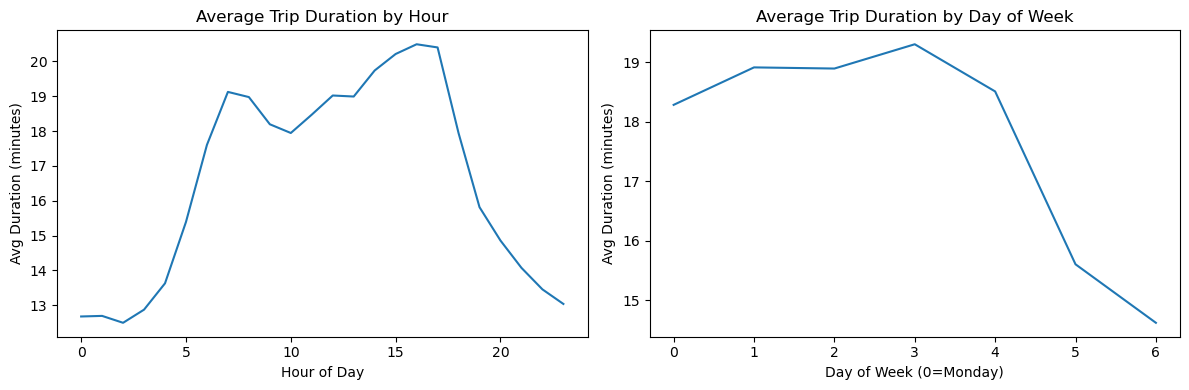

In [35]:
# Check if time features correlate with trip duration
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
df_labeled.groupby('pickup_hour')['trip_duration_minutes'].mean().plot()
plt.title('Average Trip Duration by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Avg Duration (minutes)')

plt.subplot(1, 2, 2)
df_labeled.groupby('pickup_dayofweek')['trip_duration_minutes'].mean().plot()
plt.title('Average Trip Duration by Day of Week')
plt.xlabel('Day of Week (0=Monday)')
plt.ylabel('Avg Duration (minutes)')

plt.tight_layout()
plt.show()

In [36]:
# your code here

# Train a model - let's start with Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on training set
y_train_pred = model.predict(X_train)

In [37]:
# Calculate RMSE on training set (Q6)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
print(f"\nQ6 - RMSE on training set: {train_rmse:.2f} minutes")

# Make predictions on validation set
y_val_pred = model.predict(X_val)



Q6 - RMSE on training set: 15.72 minutes


In [39]:
# Try Random Forest (usually better for tabular data)
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Calculate RMSE for Random Forest
y_train_pred_rf = rf_model.predict(X_train)
y_val_pred_rf = rf_model.predict(X_val)

train_rmse_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
val_rmse_rf = np.sqrt(mean_squared_error(y_val, y_val_pred_rf))

print(f"\n--- Random Forest Results ---")
print(f"Q6 - RMSE on training set: {train_rmse_rf:.2f} minutes")
print(f"Q7 - RMSE on validation set: {val_rmse_rf:.2f} minutes")


--- Random Forest Results ---
Q6 - RMSE on training set: 7.19 minutes
Q7 - RMSE on validation set: 12.89 minutes


Now, let's put data preprocssing steps in a function so that we can process the validation set in the same way as well.

In [127]:
# your code here

**Q7: What's the RMSE on validation?**

In [38]:
# your code here

# Calculate RMSE on validation set (Q7)
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
print(f"Q7 - RMSE on validation set: {val_rmse:.2f} minutes")

# Let's see how good our predictions are
print(f"\nAverage trip duration: {y.mean():.2f} minutes")
print(f"Training RMSE is {train_rmse/y.mean()*100:.1f}% of average duration")
print(f"Validation RMSE is {val_rmse/y.mean()*100:.1f}% of average duration")

Q7 - RMSE on validation set: 15.66 minutes

Average trip duration: 17.87 minutes
Training RMSE is 88.0% of average duration
Validation RMSE is 87.6% of average duration


## Why to use MLOps as we learn from this excercise ##

In [ ]:
# your answer here

## BONUS: 

Now, try and run this notebook on AWS Instance